In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb
import scipy as sp
from scipy import stats
import plotly.express as px
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [167]:
df = pd.read_csv("/content/drive/MyDrive/Walz 2018 Data.csv")
y = df.walz_vote
df
df_cat = pd.get_dummies(df)
df_cat
df

,walz_vote,voter_party,voter_age,voter_college,voter_female,voter_race,voter_hispanic,voter_urban
0,0,Independent,70,1,0,Other,0,Rural
1,1,DFL,38,0,0,Other,0,Urban
2,1,Republican,75,0,0,White,0,Suburban
3,1,Independent,56,1,0,White,0,Suburban
4,1,Independent,57,0,0,White,0,Urban
...,...,...,...,...,...,...,...,...
395,0,Republican,36,1,0,White,0,Urban
396,1,DFL,20,0,1,White,0,Rural
397,1,Republican,36,0,0,White,0,Suburban
398,1,DFL,64,1,1,White,0,Suburban


In [100]:
mean = np.mean(df.voter_age)
sd = np.std(df.voter_age)
mean, sd, df.voter_age.value_counts()

(54.53, 18.27290617280131, 51    12
 68    12
 70    11
 77    11
 76    10
       ..
 65     2
 66     2
 20     1
 19     1
 18     1
 Name: voter_age, Length: 68, dtype: int64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



'sb.histplot(df.voter_urban)\nsb.displot(df.voter_college)\nsb.displot(df.voter_female)\nsb.displot(df.voter_hispanic)\nsb.displot(df.voter_party)'

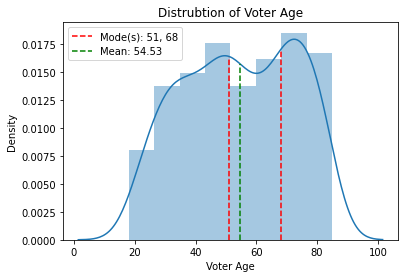

In [148]:
sb.distplot(df.voter_age, axlabel="Voter Age")
line1 = plt.axvline(51, 0 , 0.84, color = "red", ls = "--")
line2 = plt.axvline(68, 0 , 0.87, color = "red", ls = "--")
line3 = plt.axvline(54.53, 0 , 0.81, color = "green", ls = "--")
plt.legend([line2, line3], ["Mode(s): 51, 68", "Mean: 54.53"])
plt.title("Distrubtion of Voter Age")

# Need to rename the race axis, and the area/urban axis labels
'''sb.histplot(df.voter_urban)
sb.displot(df.voter_college)
sb.displot(df.voter_female)
sb.displot(df.voter_hispanic)
sb.displot(df.voter_party)'''

Text(0.5, 1.0, 'Voter Race vs Proportion of Walz Vote')

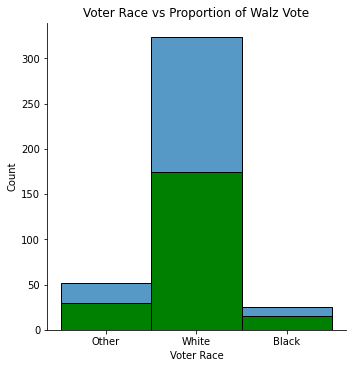

In [190]:
sb.displot(df.voter_race)
plt.xlabel("Voter Race")
b1 = plt.bar(0, 30, 1, color = "green", edgecolor = "black")
b2 = plt.bar(1, 174, 1, color = "green", edgecolor = "black")
b3 = plt.bar(2, 15, 1, color = "green", edgecolor = "black")
#plt.legend([b1, b2, b3], ["Other: 30/52", "White: 174/323", "Black: 15/25"])
plt.title("Voter Race vs Proportion of Walz Vote")

In [189]:
walz_other = []
walz_black = []
walz_white = []

for i,j in zip(df.voter_race,df.walz_vote):
  if i == "Other" and j == 1:
    walz_other = np.append(walz_other, 1)

  elif i == "Other" and j != 1:
    walz_other = np.append(walz_other, 0)

  if i == "Black" and j == 1:
    walz_black = np.append(walz_black, 1)

  elif i == "Black" and j != 1:
    walz_black = np.append(walz_black, 0)

  if i == "White" and j == 1:
    walz_white = np.append(walz_white, 1)

  elif i == "White" and j != 1:
    walz_white = np.append(walz_white, 0)



prop = np.array([np.sum(walz_other), np.sum(walz_white), np.sum(walz_black)])
prop

prop,df.voter_race.value_counts()


(array([ 30., 174.,  15.]), White    323
 Other     52
 Black     25
 Name: voter_race, dtype: int64)

Text(0.5, 1.0, 'Voter Area vs Proportion of Walz Vote')

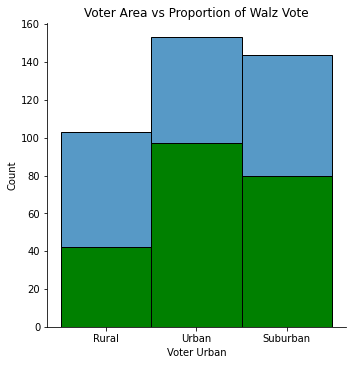

In [185]:
sb.displot(df.voter_urban)
plt.xlabel("Voter Urban")
b1 = plt.bar(0, 42, 1, color = "green", edgecolor = "black")
b2 = plt.bar(1, 97, 1, color = "green", edgecolor = "black")
b3 = plt.bar(2, 80, 1, color = "green", edgecolor = "black")
#plt.legend([b1, b2, b3], ["Other: 30/52", "White: 174/323", "Black: 15/25"])
plt.title("Voter Area vs Proportion of Walz Vote")

In [181]:
walz_rural = []
walz_urban = []
walz_sub = []

for i,j in zip(df.voter_urban,df.walz_vote):
  if i == "Rural" and j == 1:
    walz_rural = np.append(walz_rural, 1)

  elif i == "Rural" and j != 1:
    walz_rural = np.append(walz_rural, 0)

  if i == "Urban" and j == 1:
    walz_urban = np.append(walz_urban, 1)

  elif i == "Urban" and j != 1:
    walz_urban = np.append(walz_urban, 0)

  if i == "Suburban" and j == 1:
    walz_sub = np.append(walz_sub, 1)

  elif i == "Suburban" and j != 1:
    walz_sub = np.append(walz_sub, 0)


prop = np.array([np.sum(walz_rural), np.sum(walz_urban), np.sum(walz_sub)])
prop

prop,df.voter_urban.value_counts()

(array([42., 97., 80.]), Urban       153
 Suburban    144
 Rural       103
 Name: voter_urban, dtype: int64)

Brainstorming for analysis approaches:
1) Logistic Regression


In [ ]:
# Naive check for seperability
fig = px.scatter(x = df.voter_age, y=np.ones(df.voter_age.shape[0]), color=df.walz_vote)
fig.show()

**Data (Nominal Preprocessing of Categoricals):**

In [153]:
trimmed_df = pd.DataFrame(data = [df.voter_age, df.voter_college, df.voter_female, df.voter_hispanic, df_cat.voter_party_DFL, df_cat.voter_party_Independent, df_cat.voter_party_Republican, df_cat.voter_race_Black, df_cat.voter_race_White, df_cat.voter_urban_Rural, df_cat.voter_urban_Suburban, df_cat.voter_urban_Urban]).T
X_train, X_test, y_train, y_test = train_test_split(trimmed_df, df.walz_vote, test_size=0.20, random_state = 4983)
X_train

,voter_age,voter_college,voter_female,voter_hispanic,voter_party_DFL,voter_party_Independent,voter_party_Republican,voter_race_Black,voter_race_White,voter_urban_Rural,voter_urban_Suburban,voter_urban_Urban
83,26,0,0,0,1,0,0,0,1,1,0,0
397,36,0,0,0,0,0,1,0,1,0,1,0
257,36,1,0,0,0,1,0,0,1,0,1,0
199,76,0,1,0,0,0,1,1,0,1,0,0
119,46,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
177,68,0,0,0,1,0,0,0,1,0,0,1
278,39,0,1,0,1,0,0,0,0,0,0,1
310,84,0,1,0,0,1,0,0,1,1,0,0
356,49,0,1,0,1,0,0,0,1,0,1,0


**Basic Decision Tree:**

In [176]:
dt = DecisionTreeClassifier(random_state=4983)
dt.fit(X_train, y_train)
dt.score(X_train, y_train)
predictions = dt.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(dt.feature_importances_)
dt.score(X_train, y_train)
dt.score(X_test, y_test)
dt.tree_.node_count

[[19 18]
 [20 23]]
              precision    recall  f1-score   support

           0       0.49      0.51      0.50        37
           1       0.56      0.53      0.55        43

    accuracy                           0.53        80
   macro avg       0.52      0.52      0.52        80
weighted avg       0.53      0.53      0.53        80

[0.43840267 0.07092527 0.07671648 0.02549914 0.11954861 0.02463526
 0.00414142 0.02640443 0.04364952 0.09170426 0.03150804 0.0468649 ]


255

**Random Forest:**

In [155]:
rf = ensemble.RandomForestClassifier(random_state=4983)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(rf.feature_importances_)
rf.score(X_test, y_test)

[[20 17]
 [17 26]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54        37
           1       0.60      0.60      0.60        43

    accuracy                           0.57        80
   macro avg       0.57      0.57      0.57        80
weighted avg       0.57      0.57      0.57        80

[0.46550092 0.08195201 0.06047522 0.03705414 0.07718652 0.03024211
 0.07819931 0.0223751  0.05159552 0.03936333 0.02505098 0.03100484]


0.575

In [161]:
ab = ensemble.AdaBoostClassifier(random_state= 4983, learning_rate=1)
ab.fit(X_train, y_train)
predictions = ab.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(ab.feature_importances_)
ab.score(X_test, y_test)
ab.score(X_train, y_train)

[[23 14]
 [12 31]]
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        37
           1       0.69      0.72      0.70        43

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.67      0.68      0.67        80

[0.8  0.02 0.02 0.02 0.02 0.   0.06 0.02 0.   0.02 0.   0.02]


0.75625

**Logistic Regression**

In [157]:
X = trimmed_df
lg = LogisticRegression(random_state=4983)
lg.fit(X_train, y_train)
predictions = lg.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
lg.score(X_test, y_test)


full_model = smf.glm("walz_vote ~ voter_age + voter_college + voter_female + voter_hispanic + voter_party_DFL + voter_party_Independent + voter_party_Republican +voter_race_Black + voter_race_White + voter_urban_Rural + voter_urban_Suburban + voter_urban_Urban", data=df_cat, family = sm.families.Binomial())
fitted_model = full_model.fit()
print(fitted_model.summary())

[[22 15]
 [ 7 36]]
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        37
           1       0.71      0.84      0.77        43

    accuracy                           0.73        80
   macro avg       0.73      0.72      0.72        80
weighted avg       0.73      0.72      0.72        80

                 Generalized Linear Model Regression Results                  
Dep. Variable:              walz_vote   No. Observations:                  400
Model:                            GLM   Df Residuals:                      389
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -215.47
Date:                Fri, 26 Feb 2021   Deviance:                       430.94
Time:                        20:17:58   Pearson chi2:                     382.
No. Iterations:       

In [166]:
# Model with voter_college, voter_party_DFL, voter_party_Republican, voter_urban_Rural, voter_urban_Urban (taking out voter urban increases accuracy)
reduced_model = smf.glm("walz_vote ~ voter_college + voter_party_DFL + voter_party_Republican + voter_urban_Rural", data=df_cat, family = sm.families.Binomial())
fitted_model = reduced_model.fit()
print(fitted_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              walz_vote   No. Observations:                  400
Model:                            GLM   Df Residuals:                      395
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.93
Date:                Fri, 26 Feb 2021   Deviance:                       435.87
Time:                        20:58:52   Pearson chi2:                     381.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [164]:
predictions = np.where(fitted_model.predict(X_test) > 0.5, 1, 0)
error = np.sum(np.where(predictions != y_test, 1, 0))/y_test.shape[0]
print("Model Accuracy: ", 1 - error)

Model Accuracy:  0.775
